# **TITANIC**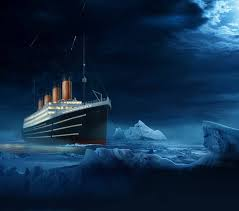

#**Titanic - Machine Learning from Disaster**
This notebook demonstrates how to predict the survival of passengers on the Titanic using machine learning. We'll walk through the process of loading the data, performing exploratory data analysis, building a predictive model, and visualizing the results.

**1. Importing Necessary Libraries and Loading Data**

We begin by importing the necessary libraries and loading the datasets.
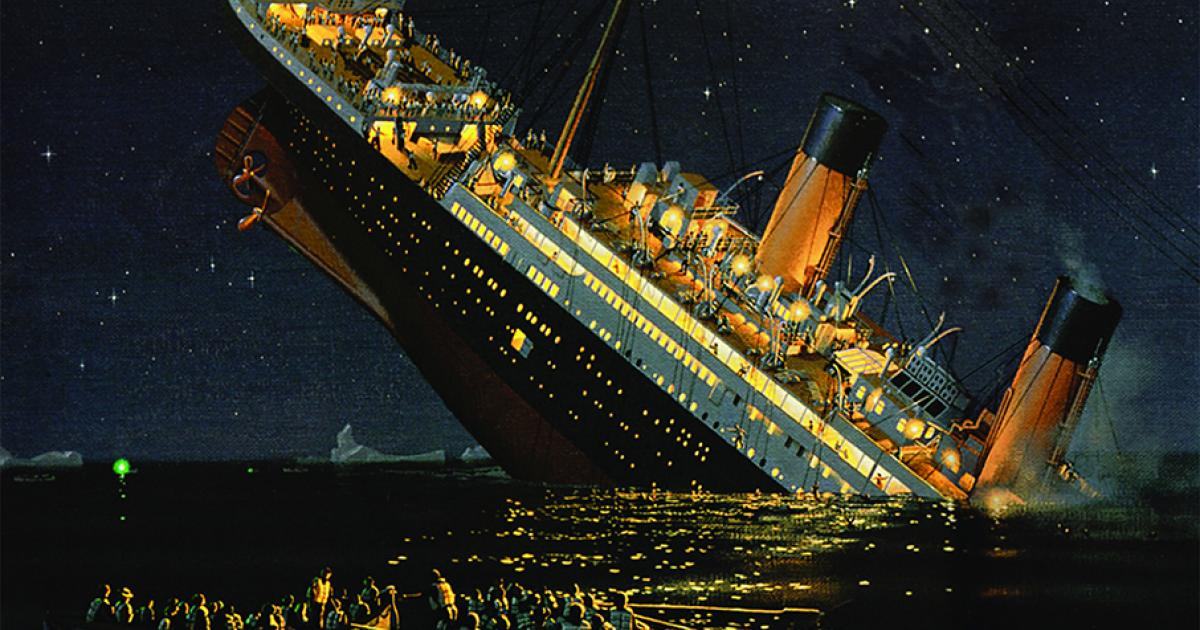

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import os


# load dataset
train_data = pd.read_csv("/content/train (1).csv")
test_data = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")


# Displaying the first few rows of the train dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



#**Survived or not = ?**
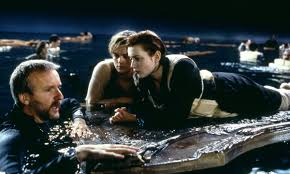

In [23]:
# cheack info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**2. Exploratory Data Analysis (EDA)**

Let's start by exploring the survival rate by gender. This will give us a quick insight into how gender may have influenced survival chances.
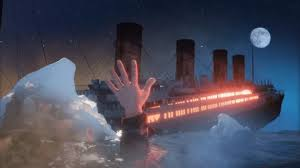

In [22]:
# Analyzing survival rates by gender
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


#**Visualization of Survival Rate by Gender**

We'll create a bar plot to visualize the survival rate based on gender. This will help us understand the disparity between male and female survival rates.

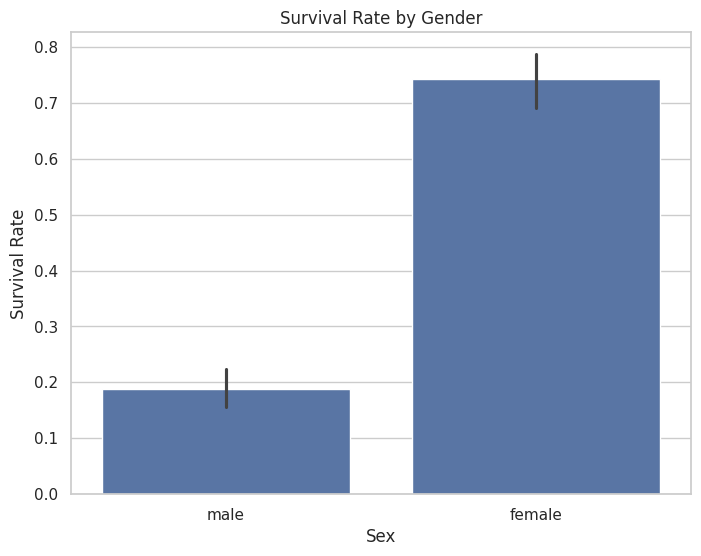

In [25]:
# visualization
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Survived", data=train_data)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

#**3. Feature Selection and Model Training**
Next, we select the key features (Pclass, Sex, SibSp, Parch) for our model. We'll convert categorical variables into numerical ones and train a RandomForestClassifier to predict survival.

In [32]:
# Feature selection and preprocessing
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Initializing and training the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
y = train_data["Survived"]
model.fit(X, y)
predictions = model.predict(X_test)


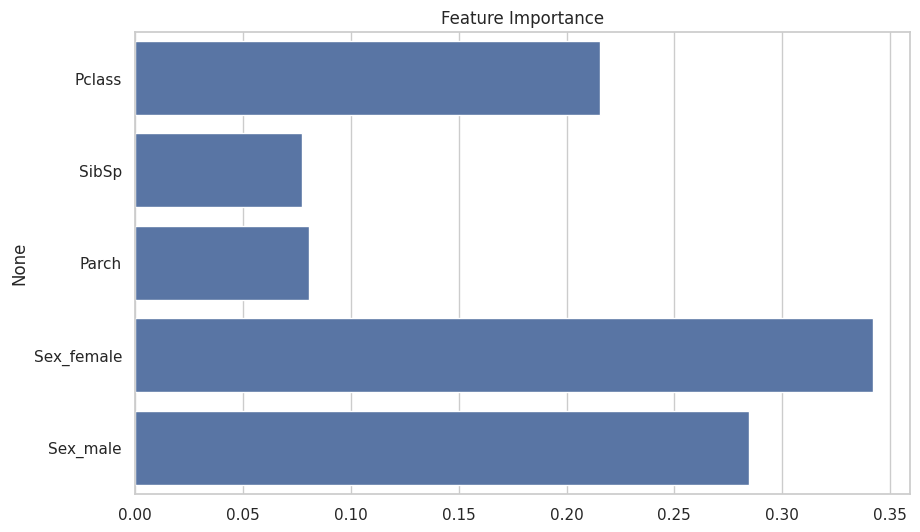

In [30]:
# visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()

#**Machine Learning(Classification)**


*  Logistic Regression

*  KNN(KNearest Neighbors)

*  Random Forest Classifier

*  Decision Tree Classifier

In [35]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7932960893854749
Confusion Matrix:
 [[90 15]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



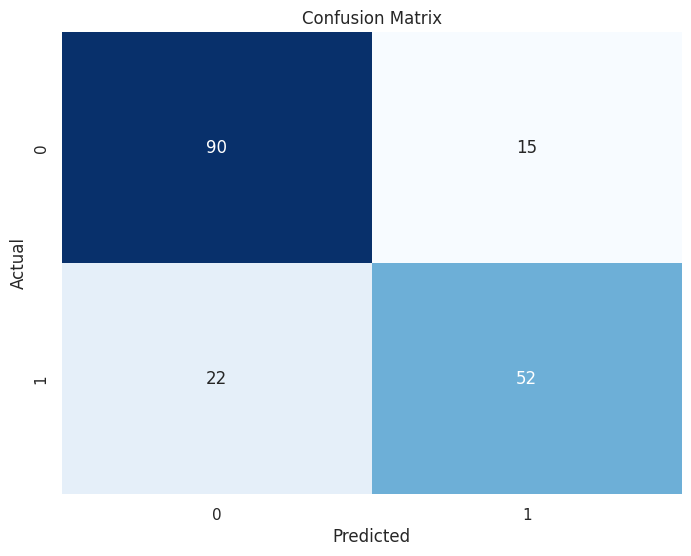

In [36]:
# plotting of confusion metrics of logistic regression
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#**KNearest Neighbour**

In [37]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# prediction
y_pred = KNN.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [42]:
# accuracy score
accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# classification report
print("Classification Report:\n", classification_rep)


Accuracy: 0.7932960893854749
Confusion Matrix:
 [[90 15]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



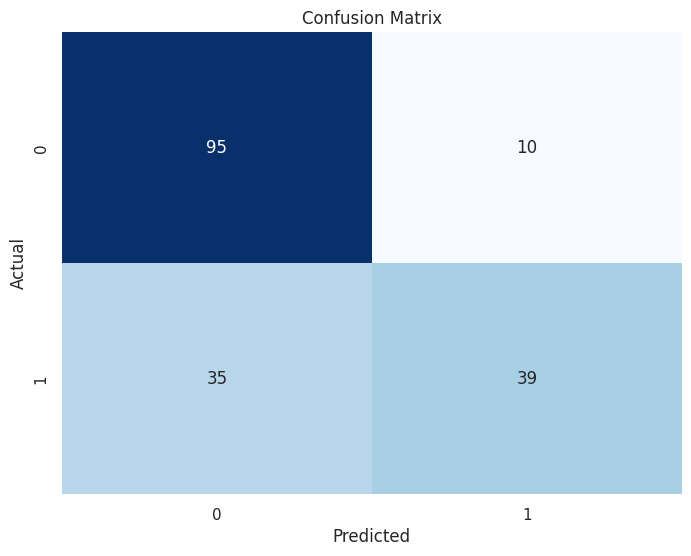

In [43]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **RandomForestClassifier**

In [52]:
# model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=4)

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=10, random_state=4)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

classification_rep = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.7877094972067039
Confusion Matrix:
[[94 11]
 [27 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       105
           1       0.81      0.64      0.71        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



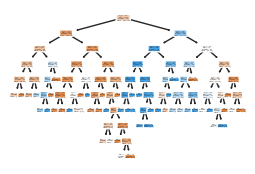

In [53]:


# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(3,2))
plot_tree(rf.estimators_[0],filled=True,rounded=True)
plt.show()



# **DecisionTreeClassifier**

In [54]:
# model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# classifiacation report
classification_rep = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_rep}")



Accuracy: 0.7821229050279329
Confusion Matrix:
[[92 13]
 [26 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       105
           1       0.79      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



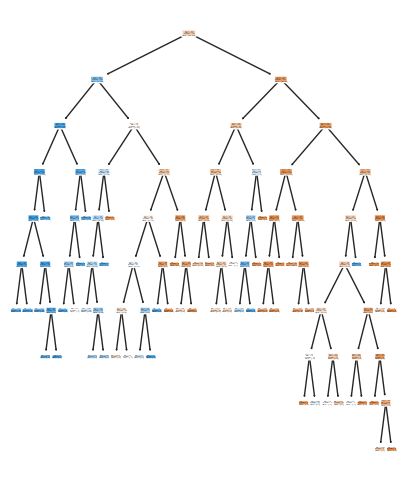

In [57]:
# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(5,6))
plot_tree(dt,filled=True,rounded=True)
plt.show()